# Chapter 2

In [131]:
#import packages
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt 
import folium
import datetime as dt
import os
import shapely 


In [132]:
# package versions
print('Pandas',pd.__version__)
print('Numpy',np.__version__)
print('Geopandas',gpd.__version__)
print('Matplotlib',matplotlib.__version__)
print('Folium',folium.__version__)
print('Shapely',shapely.__version__)

Pandas 1.4.2
Numpy 1.21.6
Geopandas 0.10.2
Matplotlib 3.5.2
Folium 0.12.1.post1
Shapely 1.8.2


In [133]:

directory=os.getcwd()
print(directory)


/Users/kultiginbozdemir/Documents/GitHub/vytal/angelo


### Customers

In [134]:
customer_postgre_df=pd.read_csv('Customer Info Data PostGre.csv', sep=',', index_col='UserId')
print(customer_postgre_df.shape)
customer_postgre_df.head(2)

(253908, 23)


LastActionTimestamp  \
UserId                                                                
b68ceac8-fa36-4149-a302-d1ce25154172  2021-10-24 16:30:28.393575+00   
b2e0a6ca-2f71-4d1e-8f66-48020f2db613         0001-01-01 00:00:00+00   

                                                            AppSessionRefreshToken  \
UserId                                                                               
b68ceac8-fa36-4149-a302-d1ce25154172  /UlOcx0cPEJNuuwyoga8FbvjyE7uHqhAwaGgRC/wEhQ=   
b2e0a6ca-2f71-4d1e-8f66-48020f2db613  UXqt3xl8bJhFT3jmb4Iv7O1yriaOS90dckDdad757zM=   

                                               RefreshTokenIssuedAt  \
UserId                                                                
b68ceac8-fa36-4149-a302-d1ce25154172  2020-10-28 17:12:52.514232+00   
b2e0a6ca-2f71-4d1e-8f66-48020f2db613  2020-10-28 17:13:40.177048+00   

                                     SignupCodeInfo_SignupCode  \
UserId                                                           
b68ceac8-fa36-4149-a302-d1ce25154172                       NaN   
b2e0a6ca-2f71-4d1e-8f66-48020f2db613                       NaN   

                                      SignupCodeInfo_SignupCodeWasUsed  \
UserId                                                                   
b68ceac8-fa36-4149-a302-d1ce25154172                             False   
b2e0a6ca-2f71-4d1e-8f66-48020f2db613                             False   

                                      IsConvertedMobileUser  \
UserId                                                        
b68ceac8-fa36-4149-a302-d1ce25154172                  False   
b2e0a6ca-2f71-4d1e-8f66-48020f2db613                  False   

                                      IsConvertedOfflineUser  IsMobileUser  \
UserId                                                                       
b68ceac8-fa36-4149-a302-d1ce25154172                   False         False   
b2e0a6ca-2f71-4d1e-8f66-48020f2db613                   False         False   

                                      IsOfflineUser  Referrer  ...  \
UserId                                                         ...   
b68ceac8-fa36-4149-a302-d1ce25154172          False       NaN  ...   
b2e0a6ca-2f71-4d1e-8f66-48020f2db613          False       NaN  ...   

                                     PasswordlessTokenRetryCount  \
UserId                                                             
b68ceac8-fa36-4149-a302-d1ce25154172                           0   
b2e0a6ca-2f71-4d1e-8f66-48020f2db613                           0   

                                      IsPaswordlessUser CheckoutLimit  \
UserId                                                                  
b68ceac8-fa36-4149-a302-d1ce25154172              False           0.0   
b2e0a6ca-2f71-4d1e-8f66-48020f2db613               True           0.0   

                                      HasPickpackPayment  \
UserId                                                     
b68ceac8-fa36-4149-a302-d1ce25154172                True   
b2e0a6ca-2f71-4d1e-8f66-48020f2db613               False   

                                      IsChargeableForOverdueContainers  \
UserId                                                                   
b68ceac8-fa36-4149-a302-d1ce25154172                              True   
b2e0a6ca-2f71-4d1e-8f66-48020f2db613                              True   

                                      HasManualCheckoutLimit  \
UserId                                                         
b68ceac8-fa36-4149-a302-d1ce25154172                   False   
b2e0a6ca-2f71-4d1e-8f66-48020f2db613                   False   

                                                      FirstCheckoutStoreId  \
UserId                                                                       
b68ceac8-fa36-4149-a302-d1ce25154172  18e868cb-bb69-4ef4-ad90-40834cba4919   
b2e0a6ca-2f71-4d1e-8f66-48020f2db613                                   NaN   

                                             First

In [135]:
customer_postgre_df.columns

Index(['LastActionTimestamp', 'AppSessionRefreshToken', 'RefreshTokenIssuedAt',
       'SignupCodeInfo_SignupCode', 'SignupCodeInfo_SignupCodeWasUsed',
       'IsConvertedMobileUser', 'IsConvertedOfflineUser', 'IsMobileUser',
       'IsOfflineUser', 'Referrer', 'MigrationDate', 'PasswordlessToken',
       'PasswordlessTokenCreatedAtUtc', 'PasswordlessTokenRetryCount',
       'IsPaswordlessUser', 'CheckoutLimit', 'HasPickpackPayment',
       'IsChargeableForOverdueContainers', 'HasManualCheckoutLimit',
       'FirstCheckoutStoreId', 'FirstCheckoutTimestamp', 'ClientName',
       'ClientVersion'],
      dtype='object')

In [136]:
customer_postgre_df['IsChargeableForOverdueContainers'].value_counts()

True     248268
False      5640
Name: IsChargeableForOverdueContainers, dtype: int64

In [137]:
# What does it mean?
customer_postgre_df['CheckoutLimit'].sort_values(ascending=False)

UserId
7937033d-6648-496c-86a2-a9b744fb3c6c    150.0
94dfa5a3-e7b0-4a02-af45-1529126b7b3f      8.0
ef0a7dd4-084c-4d02-a095-9cd6b90b9d66      8.0
b2848e3e-19d2-44e9-b9f9-d40cfa7f2222      8.0
2c574e6d-b0ba-4e91-904f-55cdb42c9785      8.0
                                        ...  
66b2890c-a4ad-4838-9a39-afa542d26e8e      NaN
591b6733-ac05-49de-86e0-9300c3a03ea5      NaN
3fd5be80-f245-427c-82da-9b37c92d4934      NaN
8c6083b0-acca-464d-b1fc-6d077f940dd6      NaN
dfaabb1a-ca43-45b5-a76b-5969ee6f1cc2      NaN
Name: CheckoutLimit, Length: 253908, dtype: float64

In [138]:
customer_postgre_df['CheckoutLimit'].value_counts()

0.0      234684
8.0        7312
2.0        2457
4.0         553
1.0          15
6.0           2
150.0         1
Name: CheckoutLimit, dtype: int64

### Containers

In [139]:
# Import container list
con_df=pd.read_csv('../data/Containerlist.csv', sep=',', index_col='Id')
con_df.head()

Name  TypeId  \
Id                                                             
00004f6b-e416-4a86-91df-5d177520d3a0  Marinha Grande       1   
00005175-379b-458a-9740-7741814674e4          Dayton       1   
0000bbe4-2051-4c32-850f-220288b868a6           Nahal       6   
0000c7c3-8f3c-4eb2-b586-dcae82555d16      Winfred F.       1   
0000f63c-9747-4c15-871f-f011198c8f88    Billy Wilder       3   

                                                               CreatedById  \
Id                                                                           
00004f6b-e416-4a86-91df-5d177520d3a0  cb73faf3-410a-4e71-83cb-c303efeaeba8   
00005175-379b-458a-9740-7741814674e4  fd3ec806-b763-48a9-992b-09e50c8a274c   
0000bbe4-2051-4c32-850f-220288b868a6                                   NaN   
0000c7c3-8f3c-4eb2-b586-dcae82555d16  cb73faf3-410a-4e71-83cb-c303efeaeba8   
0000f63c-9747-4c15-871f-f011198c8f88  fd3ec806-b763-48a9-992b-09e50c8a274c   

                                     ShortId  
Id                                            
00004f6b-e416-4a86-91df-5d177520d3a0  61CQAR  
00005175-379b-458a-9740-7741814674e4     NaN  
0000bbe4-2051-4c32-850f-220288b868a6     NaN  
0000c7c3-8f3c-4eb2-b586-dcae82555d16  Z9HBTP  
0000f63c-9747-4c15-871f-f011198c8f88     NaN

In [140]:
# Import container typs
c_type_df=pd.read_csv('../data/ContainerTypes.csv', sep=',', index_col='Id')
print(c_type_df.shape)
c_type_df

(16, 4)


Name  \
Id                                                     
1                                        1250ml Bowl   
2                                         500ml Bowl   
3                                         750ml Bowl   
4                                           Sushibox   
5                                                Cup   
6                                   Compartment Bowl   
7                                           Weckglas   
8                                           Pizzabox   
9                                           Snackpot   
10                                       Cup_pp 0.3l   
11                                       2250ml Bowl   
12                                       Cup_pp 0.2l   
13                                    Glasbox Gastro   
14                                          Glasbowl   
15  2000ml rectangular bowl ("Landgasthof Hartmann")   
16                                    Sushi Box tall   

                                          Description  CategoryId  \
Id                                                                  
1                                     A standard bowl         1.0   
2                                      A smaller Bowl         1.0   
3                                       A medium bowl         1.0   
4                                     A box for sushi         1.0   
5                           A reusable cocktail glass         1.0   
6                        A bowl with two compartments         1.0   
7                                            Weckglas         1.0   
8                                            Pizzabox         1.0   
9                                            Snackpot         1.0   
10                A coffee cup made of PP - size 0.3l         1.0   
11  A large bowl with restricted checkin for Heimk...         1.0   
12                A coffee cup made of PP - size 0.2l         1.0   
13             A glas container with two compartments         1.0   
14                         Glasbowl - Milubo Glasbowl         1.0   
15  2000ml rectangular bowl (nordic green) with re...         1.0   
16                                     Sushi Box tall         NaN   

    IsWhiteLabel  
Id                
1          False  
2          False  
3          False  
4          False  
5          False  
6          False  
7           True  
8          False  
9          False  
10         False  
11          True  
12         False  
13          True  
14         False  
15         False  
16         False

### Merchants and Partners

In [141]:
# Import merchants
m_df=pd.read_csv('Merchant_info.csv', sep=',', index_col='Id')
m_df['CreationDate']= pd.to_datetime(m_df['CreationDate'], utc=True).dt.tz_convert(tz='Europe/Berlin')
m_df.head(2)


MerchantId  \
Id                                                                           
37750976-cd54-44a5-a05a-d85d3cc9035b  2c1b374d-3d05-4b74-a260-a479c8ef9232   
a7886fd8-ef59-45b2-81c7-8b60c120c8f8  d3763657-4969-4691-8f7c-d7af98001899   

                                                        Name  Longitude  \
Id                                                                        
37750976-cd54-44a5-a05a-d85d3cc9035b  Krua Thai 2 - Heumarkt   6.960161   
a7886fd8-ef59-45b2-81c7-8b60c120c8f8      Bangkok Streetfood   8.579056   

                                       Latitude  \
Id                                                
37750976-cd54-44a5-a05a-d85d3cc9035b  50.935471   
a7886fd8-ef59-45b2-81c7-8b60c120c8f8  50.224750   

                                                         CreationDate  \
Id                                                                      
37750976-cd54-44a5-a05a-d85d3cc9035b 2020-10-20 20:04:31.643369+02:00   
a7886fd8-ef59-45b2-81c7-8b60c120c8f8 2021-03-22 10:46:58.462286+01:00   

                                      CategoryId       StreetAddress  \
Id                                                                     
37750976-cd54-44a5-a05a-d85d3cc9035b           2         Heumarkt 25   
a7886fd8-ef59-45b2-81c7-8b60c120c8f8           2  Industriestraße 12   

                                           City  SellsOfflineCards  
Id                                                                  
37750976-cd54-44a5-a05a-d85d3cc9035b       Köln              False  
a7886fd8-ef59-45b2-81c7-8b60c120c8f8  Oberursel              False

In [142]:
max(m_df['CreationDate'])

Timestamp('2022-02-28 16:48:24.258182+0100', tz='Europe/Berlin')

In [143]:
m_df.shape # number of 

(3252, 9)

In [144]:
# Import merchants
oh_df=pd.read_csv('./data/211022_Opening Hours.csv', sep=',', index_col='Id')
oh_df['StartTime']= pd.to_datetime(oh_df['StartTime'], utc=True)
oh_df['EndTime']= pd.to_datetime(oh_df['EndTime'], utc=True)
oh_df=oh_df.sort_values(['StoreId','DayOfWeek'])
oh_df.head(8)
# only the lates updated opening hours are available. It seems to be retrieved from google.maps

StoreId  DayOfWeek  \
Id                                                         
3082726  000b52b3-5a1b-4ce3-9895-ec67dcb80cd2          1   
3082724  000b52b3-5a1b-4ce3-9895-ec67dcb80cd2          2   
3082721  000b52b3-5a1b-4ce3-9895-ec67dcb80cd2          3   
3082720  000b52b3-5a1b-4ce3-9895-ec67dcb80cd2          4   
3082718  000b52b3-5a1b-4ce3-9895-ec67dcb80cd2          5   
3082717  000b52b3-5a1b-4ce3-9895-ec67dcb80cd2          6   
3102534  0011d510-7b42-4a99-b0cb-6be4d0cf23a5          1   
3102533  0011d510-7b42-4a99-b0cb-6be4d0cf23a5          2   

                        StartTime                   EndTime  InfoTextDe  \
Id                                                                        
3082726 2021-09-23 11:00:00+00:00 2021-09-23 23:45:00+00:00         NaN   
3082724 2021-09-23 11:00:00+00:00 2021-09-23 23:45:00+00:00         NaN   
3082721 2021-09-23 11:00:00+00:00 2021-09-23 23:45:00+00:00         NaN   
3082720 2021-09-23 11:00:00+00:00 2021-09-23 23:45:00+00:00         NaN   
3082718 2021-09-23 11:00:00+00:00 2021-09-23 23:45:00+00:00         NaN   
3082717 2021-09-23 11:00:00+00:00 2021-09-23 23:45:00+00:00         NaN   
3102534 2021-09-27 11:00:00+00:00 2021-09-27 13:00:00+00:00         NaN   
3102533 2021-09-27 11:00:00+00:00 2021-09-27 13:00:00+00:00         NaN   

         InfoTextEn  ShowInfoTextInsteadOfTime  
Id                                              
3082726         NaN                      False  
3082724         NaN                      False  
3082721         NaN                      False  
3082720         NaN                      False  
3082718         NaN                      False  
3082717         NaN                      False  
3102534         NaN                      False  
3102533         NaN                      False

In [145]:
oh_df.set_index('StoreId').loc['f19dbe1a-ec7c-47a1-9f54-48d60d33ce76']

DayOfWeek                 StartTime  \
StoreId                                                                     
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76          0 2021-09-23 17:00:00+00:00   
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76          2 2021-09-23 17:00:00+00:00   
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76          3 2021-09-23 17:00:00+00:00   
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76          4 2021-09-23 17:00:00+00:00   
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76          5 2021-09-23 17:00:00+00:00   
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76          6 2021-09-23 17:00:00+00:00   

                                                       EndTime  InfoTextDe  \
StoreId                                                                      
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76 2021-09-23 22:00:00+00:00         NaN   
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76 2021-09-23 01:00:00+00:00         NaN   
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76 2021-09-23 01:00:00+00:00         NaN   
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76 2021-09-23 01:00:00+00:00         NaN   
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76 2021-09-23 01:00:00+00:00         NaN   
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76 2021-09-23 01:00:00+00:00         NaN   

                                      InfoTextEn  ShowInfoTextInsteadOfTime  
StoreId                                                                      
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76         NaN                      False  
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76         NaN                      False  
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76         NaN                      False  
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76         NaN                      False  
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76         NaN                      False  
f19dbe1a-ec7c-47a1-9f54-48d60d33ce76         NaN                      False

In [146]:
min(oh_df['EndTime'])

Timestamp('2021-04-19 15:00:00+0000', tz='UTC')

In [147]:
# plot stores

map_osm = folium.Map(location=[50, 5],zoom_start=5)
for ind, row in m_df.iterrows():
    folium.CircleMarker(location=[row["Latitude"], row["Longitude"]],radius=2, popup=ind).add_to(map_osm)
map_osm

### 

In [148]:
# internal accounts in Cologne from Niclas.
# This list updated after I discored there are also some additional users in Köln who relocate the containers. 
cologne_int=pd.read_csv('cologne_int.csv', sep=',', index_col='UserId')
cologne_int.head()

User
UserId                                                 
66feb96f-7f72-49f5-9b5d-facd882c5685             Niclas
2e94a786-c2d3-457a-ae84-b9dffab9b798  CargoBike Cologne
cfa543d9-2a75-4eda-a582-870f6b4533e7              Jurij
fe3e584e-8d4c-4ce9-a720-4d2fc77f5dea             Verena
7dd7ba46-cb82-4295-8210-6fdfa7db1d82            Kerstin

In [149]:
df=pd.DataFrame()
dir_container="./data/container_location/"
for filename in os.listdir(dir_container):
  
    if 'csv' in filename:
        print(dir_container+filename)
        df=pd.concat([df,pd.read_csv(dir_container+filename, sep=',', index_col='Id')])

./data/container_location/220304 Container Location 6.csv
./data/container_location/220304 Container Location 7.csv


/var/folders/bs/8_rscwxd25z1bcq4d89vsz380000gn/T/ipykernel_3726/2024075421.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.concat([df,pd.read_csv(dir_container+filename, sep=',', index_col='Id')])


./data/container_location/220304 Container Location 5.csv
./data/container_location/220304 Container Location 4.csv
./data/container_location/220304 Container Location 1.csv
./data/container_location/220304 Container Location 3.csv
./data/container_location/220304 Container Location 2.csv


In [150]:
df.shape

(6874983, 14)

In [151]:
df.sort_index(inplace=True)

In [152]:
df.shape

(6874983, 14)

In [153]:
con_loc_df=df
del df

In [154]:
# Import container list
# correct time zone
#con_loc_df=pd.read_csv('ContainerLocations_complete.csv', sep=',', index_col='Id').drop('Unnamed: 0', axis=1)
con_loc_df['OwnerSince']= pd.to_datetime(con_loc_df['OwnerSince'],utc=True).dt.tz_convert(tz='Europe/Berlin')
con_loc_df['OwnerTill']= pd.to_datetime(con_loc_df['OwnerTill'],errors='coerce',utc=True).dt.tz_convert(tz='Europe/Berlin')

con_loc_df.head(2)
#con_loc_df['OwnerSince'].dt.tz

OwnerId  \
Id                                         
23  2bc9794d-4076-41b0-be9d-33f2c741043f   
24  aeda6030-936d-454d-a398-7591b2e93338   

                             NextOwnerId  \
Id                                         
23  aeda6030-936d-454d-a398-7591b2e93338   
24  9d15e9cd-4112-4f84-9295-b15b2182c12b   

                             ContainerId                       OwnerSince  \
Id                                                                          
23  e007545c-4ad9-4f05-8c28-1222c322001a 2019-09-22 21:57:42.003216+02:00   
24  e007545c-4ad9-4f05-8c28-1222c322001a 2019-09-22 21:58:10.958367+02:00   

                          OwnerTill  IsBillableTransaction ReturnDeadline  \
Id                                                                          
23 2019-09-22 21:58:10.958117+02:00                  False            NaN   
24 2019-09-22 21:59:32.362733+02:00                   True            NaN   

    Status TransactionId         LastReturnReminderSent  LocationNumber  \
Id                                                                        
23       1           NaN  2020-09-03 15:02:38.794937+00               1   
24       1           NaN  2020-09-03 15:02:38.794937+00               2   

   DeliveryTokenId LastStatusUpdateAt  IsSelfScan  
Id                                                 
23             NaN                NaN       False  
24             NaN                NaN       False

In [155]:
con_loc_df.columns

Index(['OwnerId', 'NextOwnerId', 'ContainerId', 'OwnerSince', 'OwnerTill',
       'IsBillableTransaction', 'ReturnDeadline', 'Status', 'TransactionId',
       'LastReturnReminderSent', 'LocationNumber', 'DeliveryTokenId',
       'LastStatusUpdateAt', 'IsSelfScan'],
      dtype='object')

In [156]:
# Size of df
print(con_loc_df.shape)

(6874983, 14)


In [157]:
min(con_loc_df['OwnerSince']) 

Timestamp('2019-09-22 21:57:42.003216+0200', tz='Europe/Berlin')

In [158]:
max(con_loc_df['OwnerSince'])

Timestamp('2022-03-04 17:53:36.092649+0100', tz='Europe/Berlin')

In [159]:
con_loc_df.tail(2)

OwnerId NextOwnerId  \
Id                                                          
6875984  8864964b-8eee-4634-8a70-96824fcbf595         NaN   
6875985  6004d7ce-91b6-4890-9bae-9204bca4e75e         NaN   

                                  ContainerId  \
Id                                              
6875984  7af362c7-9d8c-4a38-bbb7-0894bbd08d59   
6875985  8c8abc6d-067e-48bc-b559-803370cfa2d2   

                              OwnerSince OwnerTill  IsBillableTransaction  \
Id                                                                          
6875984 2022-03-04 17:53:35.948971+01:00       NaT                  False   
6875985 2022-03-04 17:53:36.092649+01:00       NaT                  False   

        ReturnDeadline  Status                         TransactionId  \
Id                                                                     
6875984            NaN       1  b418dfdd-ef89-4cf8-a73e-2355eacd5712   
6875985            NaN       1  cd40d543-ebb7-4614-9ada-09c39373bb66   

        LastReturnReminderSent  LocationNumber DeliveryTokenId  \
Id                                                               
6875984                    NaN              14             NaN   
6875985                    NaN              42             NaN   

        LastStatusUpdateAt  IsSelfScan  
Id                                      
6875984                NaN       False  
6875985                NaN       False

In [160]:
con_loc_df['IsSelfScan'].value_counts()

False    6767720
True      107263
Name: IsSelfScan, dtype: int64

In [161]:
# What is Status ?? 
con_loc_df['Status'].value_counts()


5     6551936
1      246659
2       34387
4       13538
9        7699
11       6269
7        5642
0        4733
8        2623
6         736
12        386
3         322
10         53
Name: Status, dtype: int64

In [162]:
# What is ReturnDeadline ?? 
con_loc_df['ReturnDeadline'].isna().value_counts()

True     3830897
False    3044086
Name: ReturnDeadline, dtype: int64

In [163]:
# LastStatusUpdateAt, 
con_loc_df['LastStatusUpdateAt'].isna().value_counts()


True     6637608
False     237375
Name: LastStatusUpdateAt, dtype: int64

In [164]:
# DeliveryTokenId
con_loc_df['DeliveryTokenId'].isna().value_counts()


True     6735290
False     139693
Name: DeliveryTokenId, dtype: int64

<AxesSubplot:>

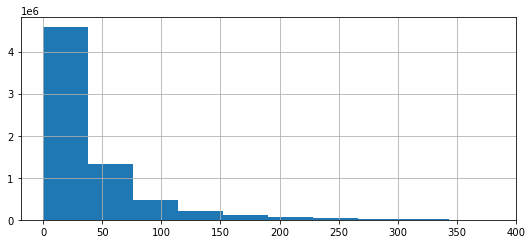

In [165]:
# Niclas said that it refers the location in the database. 
con_loc_df['LocationNumber'].hist()

In [166]:
con_loc_df.columns

Index(['OwnerId', 'NextOwnerId', 'ContainerId', 'OwnerSince', 'OwnerTill',
       'IsBillableTransaction', 'ReturnDeadline', 'Status', 'TransactionId',
       'LastReturnReminderSent', 'LocationNumber', 'DeliveryTokenId',
       'LastStatusUpdateAt', 'IsSelfScan'],
      dtype='object')

In [167]:
# Drop columns that I have no hope of getting sth.
drop_list=['LastReturnReminderSent','LocationNumber', 'DeliveryTokenId',
       'LastStatusUpdateAt', 'IsSelfScan', 'Status','IsSelfScan','ReturnDeadline']
try:
    con_loc_df=con_loc_df.drop(drop_list, axis=1)
except: print('no drop operation')
del drop_list

In [168]:

con_loc_df.head(2)

OwnerId  \
Id                                         
23  2bc9794d-4076-41b0-be9d-33f2c741043f   
24  aeda6030-936d-454d-a398-7591b2e93338   

                             NextOwnerId  \
Id                                         
23  aeda6030-936d-454d-a398-7591b2e93338   
24  9d15e9cd-4112-4f84-9295-b15b2182c12b   

                             ContainerId                       OwnerSince  \
Id                                                                          
23  e007545c-4ad9-4f05-8c28-1222c322001a 2019-09-22 21:57:42.003216+02:00   
24  e007545c-4ad9-4f05-8c28-1222c322001a 2019-09-22 21:58:10.958367+02:00   

                          OwnerTill  IsBillableTransaction TransactionId  
Id                                                                        
23 2019-09-22 21:58:10.958117+02:00                  False           NaN  
24 2019-09-22 21:59:32.362733+02:00                   True           NaN

In [169]:
#merge container_id with transactional data
con_loc_df=pd.merge(con_loc_df,con_df['TypeId'], how='left', left_on='ContainerId', right_on=con_df.index)\
.rename(columns={'TypeId':'container_type_id'})

con_loc_df.head(2)

OwnerId                           NextOwnerId  \
0  2bc9794d-4076-41b0-be9d-33f2c741043f  aeda6030-936d-454d-a398-7591b2e93338   
1  aeda6030-936d-454d-a398-7591b2e93338  9d15e9cd-4112-4f84-9295-b15b2182c12b   

                            ContainerId                       OwnerSince  \
0  e007545c-4ad9-4f05-8c28-1222c322001a 2019-09-22 21:57:42.003216+02:00   
1  e007545c-4ad9-4f05-8c28-1222c322001a 2019-09-22 21:58:10.958367+02:00   

                         OwnerTill  IsBillableTransaction TransactionId  \
0 2019-09-22 21:58:10.958117+02:00                  False           NaN   
1 2019-09-22 21:59:32.362733+02:00                   True           NaN   

   container_type_id  
0                1.0  
1                1.0

In [170]:
con_loc_df.shape

(6874983, 8)

In [171]:
con_loc_df.columns

Index(['OwnerId', 'NextOwnerId', 'ContainerId', 'OwnerSince', 'OwnerTill',
       'IsBillableTransaction', 'TransactionId', 'container_type_id'],
      dtype='object')

In [172]:
store_appuser_df=pd.read_csv('080222_MerchantStoreAppuser.csv', sep=',', index_col='UserId')
store_appuser_df.head()

MerchantStoreId
UserId                                                                    
0009fe5f-fe7d-4bb7-8a12-26f3508435df  8cdcee12-7890-4f63-ab14-5681450bf5b5
00146127-e7f7-4f9d-a1af-07e1807fe51a  bd702e91-563c-4739-91d5-d54003497591
0015ec7d-1d18-4039-8e2a-0fb6f349ea61  2c63034c-4e66-4687-aeb7-69c8a2917642
002e9b97-df68-4bd6-8cd0-8b7e71fc515a  a11be428-8adf-4656-b7ec-8f1c18d418a7
00384dae-d822-4909-bd4e-df9bc7f17a70  2831b45e-fc81-4ffd-befd-2fa43aed5884

In [173]:
# left join (container_location & store_appuser)
con_loc_df=con_loc_df.merge(store_appuser_df, how='left', left_on='OwnerId', \
                            right_on=store_appuser_df.index).rename({'MerchantStoreId':'owner_store_id'}, axis='columns')

In [174]:
con_loc_df=con_loc_df.merge(store_appuser_df, how='left', \
                            left_on='NextOwnerId', right_on=store_appuser_df.index).\
rename({'MerchantStoreId':'next_owner_store_id'},axis='columns')

In [175]:
con_loc_df.shape

(6874983, 10)

In [176]:
#Some users are not recorded  into the corresponding table 
con_loc_df['NextOwnerId'].isin(customer_postgre_df.index).value_counts()


True     6373915
False     501068
Name: NextOwnerId, dtype: int64

In [177]:
con_loc_df['OwnerId'].isin(customer_postgre_df.index).value_counts()


True     6618393
False     256590
Name: OwnerId, dtype: int64

In [178]:
# Add the info from Niclas's Cologne internal users
con_loc_df['owner_co_int_']=con_loc_df['OwnerId'].isin(cologne_int.index)
con_loc_df['next_owner_co_int_']=con_loc_df['NextOwnerId'].isin(cologne_int.index)
con_loc_df.shape

(6874983, 12)

In [179]:
# Import user list
user_df=pd.read_csv('./Users_sanitized.csv', sep=',', index_col='UserId')
print(user_df.shape)
user_df=user_df.drop('Unnamed: 0', axis=1)

set(list(user_df['ClaimType']))

(294670, 4)


{'admin',
 'catering_consumer',
 'consumer',
 'imc',
 'imsmc',
 'storeappuser',
 'superAdmin'}

In [180]:
user_df.sort_values('CreationTimestamp', ascending=True)

CreationTimestamp ClaimType  \
UserId                                                                          
1a05fc20-7cf7-41c6-b5c5-64b1c4deccab         1970-01-01 00:00:00+00  consumer   
08360e8f-2bf5-4651-a827-6a7302ffff80         1970-01-01 00:00:00+00  consumer   
05de6f0d-1e07-4672-bed5-3d0c0efc7b95         1970-01-01 00:00:00+00  consumer   
38fda678-32d1-4174-90ab-644fb678156d         1970-01-01 00:00:00+00  consumer   
e358dff4-9472-45b2-a7d3-36822cb23823         1970-01-01 00:00:00+00  consumer   
...                                                             ...       ...   
c2007cf6-8b61-4250-b728-8a33b78b0f49  2022-02-28 17:43:25.177609+00  consumer   
3bb274fe-51c4-44e4-88c9-313a93e97103  2022-02-28 17:46:37.154817+00  consumer   
a793ce52-a5b4-47f6-9c69-0b0c16f6cdd5  2022-02-28 17:50:39.011882+00  consumer   
3e3f2631-cbd7-41df-8033-3c51bbb50d94   2022-02-28 17:52:06.62581+00  consumer   
f3d32636-0228-40ba-bcb3-db4787165c78  2022-02-28 17:56:52.312491+00  consumer   

                                      IsOfflineUser  
UserId                                               
1a05fc20-7cf7-41c6-b5c5-64b1c4deccab          False  
08360e8f-2bf5-4651-a827-6a7302ffff80          False  
05de6f0d-1e07-4672-bed5-3d0c0efc7b95          False  
38fda678-32d1-4174-90ab-644fb678156d          False  
e358dff4-9472-45b2-a7d3-36822cb23823          False  
...                                             ...  
c2007cf6-8b61-4250-b728-8a33b78b0f49          False  
3bb274fe-51c4-44e4-88c9-313a93e97103          False  
a793ce52-a5b4-47f6-9c69-0b0c16f6cdd5          False  
3e3f2631-cbd7-41df-8033-3c51bbb50d94          False  
f3d32636-0228-40ba-bcb3-db4787165c78          False  

[294670 rows x 3 columns]

In [181]:
user_df.index.is_unique


False

In [182]:
user_df = user_df.sort_values('CreationTimestamp', ascending=True)[~user_df.index.duplicated(keep='last')]
user_df.shape

(294659, 3)

In [183]:
# add user claim type data
con_loc_df=con_loc_df.join(user_df['ClaimType'],on='OwnerId', how='left').rename(columns={'ClaimType':'owner_claim_type'})
con_loc_df=con_loc_df.join(user_df['ClaimType'],on='NextOwnerId', how='left').rename(columns={'ClaimType':'next_owner_claim_type'})


In [184]:
con_loc_df.shape

(6876582, 14)

### ???: Both owner and nextowner are internal in the Container_Location table. How, why?

### ????? : 564 Transactions in Container_Location do not have UserId foreign key. Why?

In [185]:
#user_false=loc_df['next_owner_user_']==False

#print('Number of transactions: ',loc_df[user_false].shape)
#loc_df[user_false].tail(30)

### Journey of a container

### Cologne Analysis
We will work only the operations in Cologne. Therefore, we take spatial intersection of Cologne boundary polygon with store location points. <br>
http://www.diva-gis.org/gdata

/Users/kultiginbozdemir/opt/anaconda3/envs/vytal/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

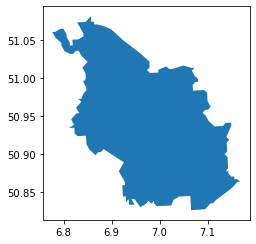

In [186]:
# Import map of German counties as geopandas file
boundaries = gpd.read_file('../data/DEU_adm/DEU_adm3.shp', encoding = "utf-8").set_crs(4326, allow_override=True)


#Take only Cologne
cologne=boundaries[boundaries["ID_3"]==289]
cologne.to_file("cologne.geojson", driver='GeoJSON')
cologne.plot()

In [187]:
# create geo dataframe for Merchants

from shapely.geometry import Point

m_gdf = gpd.GeoDataFrame(m_df, geometry=gpd.points_from_xy(m_df['Longitude'], m_df['Latitude'])).set_crs(4326, allow_override=True)

#m_gdf.crs = {'init' :'epsg:4326'}


In [188]:
m_gdf.head(2)

MerchantId  \
Id                                                                           
37750976-cd54-44a5-a05a-d85d3cc9035b  2c1b374d-3d05-4b74-a260-a479c8ef9232   
a7886fd8-ef59-45b2-81c7-8b60c120c8f8  d3763657-4969-4691-8f7c-d7af98001899   

                                                        Name  Longitude  \
Id                                                                        
37750976-cd54-44a5-a05a-d85d3cc9035b  Krua Thai 2 - Heumarkt   6.960161   
a7886fd8-ef59-45b2-81c7-8b60c120c8f8      Bangkok Streetfood   8.579056   

                                       Latitude  \
Id                                                
37750976-cd54-44a5-a05a-d85d3cc9035b  50.935471   
a7886fd8-ef59-45b2-81c7-8b60c120c8f8  50.224750   

                                                         CreationDate  \
Id                                                                      
37750976-cd54-44a5-a05a-d85d3cc9035b 2020-10-20 20:04:31.643369+02:00   
a7886fd8-ef59-45b2-81c7-8b60c120c8f8 2021-03-22 10:46:58.462286+01:00   

                                      CategoryId       StreetAddress  \
Id                                                                     
37750976-cd54-44a5-a05a-d85d3cc9035b           2         Heumarkt 25   
a7886fd8-ef59-45b2-81c7-8b60c120c8f8           2  Industriestraße 12   

                                           City  SellsOfflineCards  \
Id                                                                   
37750976-cd54-44a5-a05a-d85d3cc9035b       Köln              False   
a7886fd8-ef59-45b2-81c7-8b60c120c8f8  Oberursel              False   

                                                      geometry  
Id                                                              
37750976-cd54-44a5-a05a-d85d3cc9035b  POINT (6.96016 50.93547)  
a7886fd8-ef59-45b2-81c7-8b60c120c8f8  POINT (8.57906 50.22475)

In [189]:
#Geospatial join of merchants and Cologne polygon
vytal_cologne=gpd.sjoin( cologne, m_gdf, op='contains' ).to_crs(4326)
print(vytal_cologne.shape)
vytal_cologne.index=vytal_cologne["index_right"]
m_cologne=m_gdf[m_gdf.index.isin(vytal_cologne.index)]
m_cologne
m_cologne.shape

(377, 24)


/Users/kultiginbozdemir/opt/anaconda3/envs/vytal/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(377, 10)

In [190]:
m_cologne.head(2)

MerchantId  \
Id                                                                           
37750976-cd54-44a5-a05a-d85d3cc9035b  2c1b374d-3d05-4b74-a260-a479c8ef9232   
d4e38d94-eb54-4049-b721-4da7c79f3891  2c9fdbe4-3e32-4916-ba19-147258d0dd1d   

                                                        Name  Longitude  \
Id                                                                        
37750976-cd54-44a5-a05a-d85d3cc9035b  Krua Thai 2 - Heumarkt   6.960161   
d4e38d94-eb54-4049-b721-4da7c79f3891         Fenster zum Hof   6.944754   

                                       Latitude  \
Id                                                
37750976-cd54-44a5-a05a-d85d3cc9035b  50.935471   
d4e38d94-eb54-4049-b721-4da7c79f3891  50.948689   

                                                         CreationDate  \
Id                                                                      
37750976-cd54-44a5-a05a-d85d3cc9035b 2020-10-20 20:04:31.643369+02:00   
d4e38d94-eb54-4049-b721-4da7c79f3891 2019-09-22 21:53:24.930669+02:00   

                                      CategoryId   StreetAddress  City  \
Id                                                                       
37750976-cd54-44a5-a05a-d85d3cc9035b           2     Heumarkt 25  Köln   
d4e38d94-eb54-4049-b721-4da7c79f3891           2  Im Mediapark 5  Köln   

                                      SellsOfflineCards  \
Id                                                        
37750976-cd54-44a5-a05a-d85d3cc9035b              False   
d4e38d94-eb54-4049-b721-4da7c79f3891              False   

                                                      geometry  
Id                                                              
37750976-cd54-44a5-a05a-d85d3cc9035b  POINT (6.96016 50.93547)  
d4e38d94-eb54-4049-b721-4da7c79f3891  POINT (6.94475 50.94869)

<AxesSubplot:title={'center':'Vytal in Cologne'}>

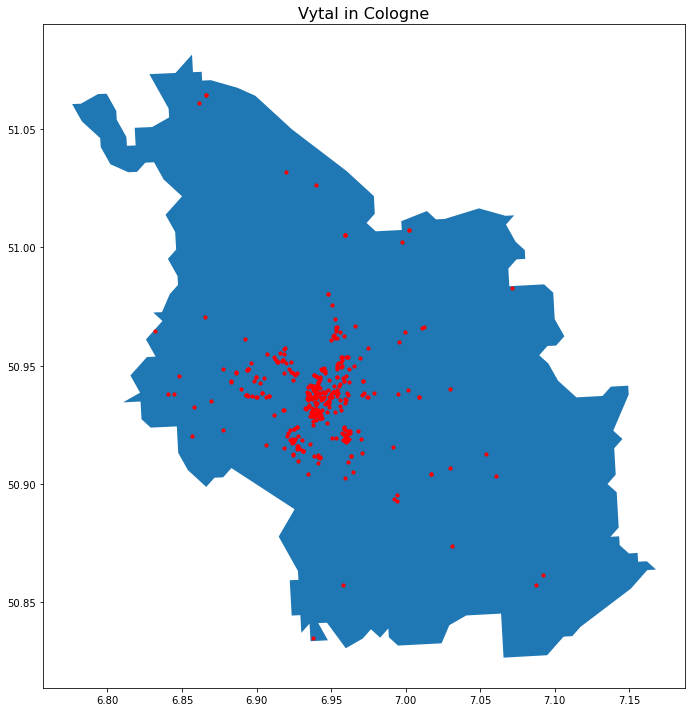

In [191]:

fig, ax = plt.subplots(figsize=(12,10))
plt.title('Vytal in Cologne', fontsize=16, color='black')
cologne.plot(ax=ax)
m_cologne.plot(ax=ax, markersize=10, color='red')

In [192]:
m_cologne.head(2)

MerchantId  \
Id                                                                           
37750976-cd54-44a5-a05a-d85d3cc9035b  2c1b374d-3d05-4b74-a260-a479c8ef9232   
d4e38d94-eb54-4049-b721-4da7c79f3891  2c9fdbe4-3e32-4916-ba19-147258d0dd1d   

                                                        Name  Longitude  \
Id                                                                        
37750976-cd54-44a5-a05a-d85d3cc9035b  Krua Thai 2 - Heumarkt   6.960161   
d4e38d94-eb54-4049-b721-4da7c79f3891         Fenster zum Hof   6.944754   

                                       Latitude  \
Id                                                
37750976-cd54-44a5-a05a-d85d3cc9035b  50.935471   
d4e38d94-eb54-4049-b721-4da7c79f3891  50.948689   

                                                         CreationDate  \
Id                                                                      
37750976-cd54-44a5-a05a-d85d3cc9035b 2020-10-20 20:04:31.643369+02:00   
d4e38d94-eb54-4049-b721-4da7c79f3891 2019-09-22 21:53:24.930669+02:00   

                                      CategoryId   StreetAddress  City  \
Id                                                                       
37750976-cd54-44a5-a05a-d85d3cc9035b           2     Heumarkt 25  Köln   
d4e38d94-eb54-4049-b721-4da7c79f3891           2  Im Mediapark 5  Köln   

                                      SellsOfflineCards  \
Id                                                        
37750976-cd54-44a5-a05a-d85d3cc9035b              False   
d4e38d94-eb54-4049-b721-4da7c79f3891              False   

                                                      geometry  
Id                                                              
37750976-cd54-44a5-a05a-d85d3cc9035b  POINT (6.96016 50.93547)  
d4e38d94-eb54-4049-b721-4da7c79f3891  POINT (6.94475 50.94869)

In [193]:
m_cologne.shape

(377, 10)

In [194]:
map_osm = folium.Map(location=[50.93, 6.91],zoom_start=11)
for ind, row in m_cologne.iterrows():
    
    folium.CircleMarker(location=[row["Latitude"], row["Longitude"]],radius=2, popup=ind, color='purple').add_to(map_osm)
geo_j = cologne.to_json()
geo_j = folium.GeoJson(data=geo_j,style_function=lambda x: {'fillColor': 'orange'})
geo_j.add_to(map_osm)
map_osm

### Cologne transactions

In [195]:
# check-ins in Cologne
# import data
co_in=con_loc_df[con_loc_df["next_owner_store_id"].isin(m_cologne.index)]
co_in=gpd.GeoDataFrame(pd.merge(co_in, m_cologne['geometry'], \
                                left_on=co_in["next_owner_store_id"], right_on=m_cologne.index))\
.set_crs(4326).drop('key_0',axis=1).to_crs(5676)


print(co_in.shape)




# merge with public transport distance df
#co_in=pd.merge(co_in,co_store_delta_w['HubDist'],how='left', \
#                 left_on="next_owner_store_id", right_index=True)

co_in['OwnerTill_r']=co_in['OwnerTill'].dt.round('H')





(452938, 15)


# ?????

In [196]:
co_in.head(2)

OwnerId                           NextOwnerId  \
0  3f98d1ae-9adb-4c8c-8a4d-de1b1fabf47c  3f98d1ae-9adb-4c8c-8a4d-de1b1fabf47c   
1  837802c9-7bb4-4c50-bf75-18ff136eb8f6  3f98d1ae-9adb-4c8c-8a4d-de1b1fabf47c   

                            ContainerId                       OwnerSince  \
0  c4d6f49e-f480-4c3f-9e08-cb3c6202b693 2019-09-23 09:53:47.225788+02:00   
1  daf1fb53-fa42-40ec-8141-0fa80259fff7 2019-09-25 12:40:18.513492+02:00   

                         OwnerTill  IsBillableTransaction TransactionId  \
0 2020-08-10 12:16:30.900345+02:00                  False           NaN   
1 2019-09-30 12:56:39.899646+02:00                  False           NaN   

   container_type_id                        owner_store_id  \
0                1.0  632c5d83-6266-4f57-be97-b60154a9464d   
1                1.0                                   NaN   

                    next_owner_store_id  owner_co_int_  next_owner_co_int_  \
0  632c5d83-6266-4f57-be97-b60154a9464d          False               False   
1  632c5d83-6266-4f57-be97-b60154a9464d          False               False   

  owner_claim_type next_owner_claim_type                         geometry  \
0     storeappuser          storeappuser  POINT (2566339.030 5646362.381)   
1         consumer          storeappuser  POINT (2566339.030 5646362.381)   

                OwnerTill_r  
0 2020-08-10 12:00:00+02:00  
1 2019-09-30 13:00:00+02:00

In [197]:
# The following additional columns are for Gephi. 
# NetworkX is not working well since the data is too large.

co_in['Source']=co_in['OwnerId']
co_in['Target']=co_in['next_owner_store_id']

co_in.to_csv('co_in.csv')
#co_in.to_file("co_in.geojson", driver='GeoJSON') #it takes too much time


co_in.shape

(452938, 18)

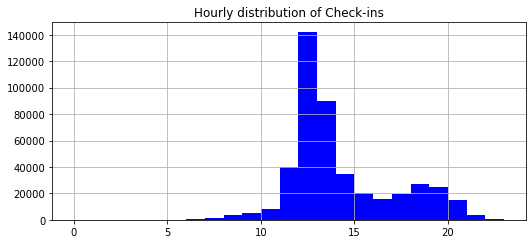

In [198]:
#plot hour distribution for check-ins
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
co_in['OwnerSince'].dt.hour.hist(bins=23,color='blue')
plt.title('Hourly distribution of Check-ins')
plt.show()
# shows the check-in time distribution in a day

In [199]:
# filter check-outs for Cologne
co_out=con_loc_df[con_loc_df["owner_store_id"].isin(m_cologne.index)]

print(co_out.shape)
#merge store_id and geo location 
co_out=gpd.GeoDataFrame(pd.merge(co_out, m_cologne['geometry'], \
                                 how='left',left_on=co_out["owner_store_id"], \
                                 right_on=m_cologne.index)).set_crs(4326).drop('key_0',axis=1).to_crs(5676)


#co_out['OwnerSince_r']=co_out['OwnerSince'].dt.round('H')

print(co_out.shape)
  
# For Gelphi Graph analysis
co_out['Source']=co_out['owner_store_id']
co_out['Target']=co_out['NextOwnerId']
co_out.to_csv('co_out.csv')


#co_out.to_file("co_out.geojson", driver='GeoJSON')

(498213, 14)
(498213, 15)


In [200]:
co_out.head(2) 

OwnerId                           NextOwnerId  \
0  e5c7976f-92fb-408f-b852-01b98ba1723d  c96f1b99-5db4-45ce-8294-2f31e771e35f   
1  e5c7976f-92fb-408f-b852-01b98ba1723d  d9d8a373-29f0-4fe5-8f17-39669083ac48   

                            ContainerId                       OwnerSince  \
0  963c9cb3-3c7b-4c85-be71-e808a471706b 2019-09-23 09:29:01.132709+02:00   
1  c33c72e1-8a28-4ee5-b367-8ea36f13e00e 2019-09-23 09:29:08.691234+02:00   

                         OwnerTill  IsBillableTransaction TransactionId  \
0 2019-10-07 12:06:31.430389+02:00                   True           NaN   
1 2019-10-08 13:27:17.176081+02:00                   True           NaN   

   container_type_id                        owner_store_id  \
0                1.0  e20e6c15-6507-4427-8b68-e1d1f870b924   
1                1.0  e20e6c15-6507-4427-8b68-e1d1f870b924   

  next_owner_store_id  owner_co_int_  next_owner_co_int_ owner_claim_type  \
0                 NaN          False               False     storeappuser   
1                 NaN          False               False     storeappuser   

  next_owner_claim_type                         geometry  \
0              consumer  POINT (2566096.057 5646020.265)   
1              consumer  POINT (2566096.057 5646020.265)   

                                 Source                                Target  
0  e20e6c15-6507-4427-8b68-e1d1f870b924  c96f1b99-5db4-45ce-8294-2f31e771e35f  
1  e20e6c15-6507-4427-8b68-e1d1f870b924  d9d8a373-29f0-4fe5-8f17-39669083ac48

In [201]:
# number of check-outs until ... 
co_out.shape, max(co_out['OwnerSince'])

((498213, 17),
 Timestamp('2022-03-04 17:51:41.821613+0100', tz='Europe/Berlin'))

In [202]:
# number of check-outs until ... 
co_in.shape, max(co_in['OwnerTill'])

((452938, 18),
 Timestamp('2022-03-04 17:51:41.821613+0100', tz='Europe/Berlin'))

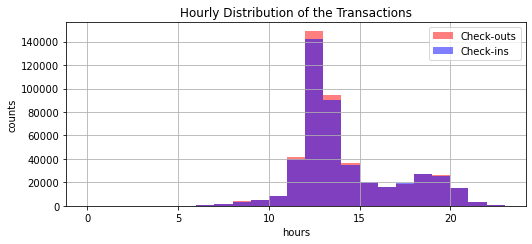

In [203]:
#plot hour distribution for check-ins and outs
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
co_out['OwnerTill'].dt.hour.hist(bins=23,alpha = 0.5, color='red', label='Check-outs')
co_in['OwnerSince'].dt.hour.hist(bins=23,alpha = 0.5, color='blue', label='Check-ins')
plt.legend()
plt.title('Hourly Distribution of the Transactions')
plt.xlabel('hours')
plt.ylabel('counts')
plt.show()


## Vytal internal  movements in Cologne

In [204]:
cologne_int.head(5)

User
UserId                                                 
66feb96f-7f72-49f5-9b5d-facd882c5685             Niclas
2e94a786-c2d3-457a-ae84-b9dffab9b798  CargoBike Cologne
cfa543d9-2a75-4eda-a582-870f6b4533e7              Jurij
fe3e584e-8d4c-4ce9-a720-4d2fc77f5dea             Verena
7dd7ba46-cb82-4295-8210-6fdfa7db1d82            Kerstin

In [205]:
# cologne internal check-ins
co_in_int=co_in[co_in['OwnerId'].isin(cologne_int.index)]
print(co_in_int.shape)
co_in_int.head(3)

(16575, 18)


OwnerId  \
1717  74c3df9f-fe6b-48bb-9e29-f706778c218f   
1853  2e94a786-c2d3-457a-ae84-b9dffab9b798   
1854  2e94a786-c2d3-457a-ae84-b9dffab9b798   

                               NextOwnerId  \
1717  87625bbc-029c-4126-bc94-31d84a43e561   
1853  87625bbc-029c-4126-bc94-31d84a43e561   
1854  87625bbc-029c-4126-bc94-31d84a43e561   

                               ContainerId                       OwnerSince  \
1717  7b4420cc-9fea-471c-b933-7be145832509 2021-07-02 10:01:47.623360+02:00   
1853  67b0eead-d351-4fec-86ee-f7031e766274 2021-09-07 16:26:18.979438+02:00   
1854  2d59c366-65dd-4b90-8d57-6260290ca825 2021-09-07 16:26:18.979438+02:00   

                            OwnerTill  IsBillableTransaction  \
1717 2021-07-02 10:02:28.692683+02:00                  False   
1853 2021-09-10 11:58:33.431318+02:00                  False   
1854 2021-09-10 11:58:33.431318+02:00                  False   

                             TransactionId  container_type_id owner_store_id  \
1717  621432ce-84a8-4b2d-90a7-ba4e2369254b                3.0            NaN   
1853  6d7ca6ea-94cc-4718-8838-54380a9c511e                1.0            NaN   
1854  6d7ca6ea-94cc-4718-8838-54380a9c511e                1.0            NaN   

                       next_owner_store_id  owner_co_int_  next_owner_co_int_  \
1717  cdd31b00-ed5e-4972-ae6f-3b516c1f86bc           True               False   
1853  cdd31b00-ed5e-4972-ae6f-3b516c1f86bc           True               False   
1854  cdd31b00-ed5e-4972-ae6f-3b516c1f86bc           True               False   

     owner_claim_type next_owner_claim_type                         geometry  \
1717         consumer          storeappuser  POINT (2566405.928 5646320.264)   
1853            admin          storeappuser  POINT (2566405.928 5646320.264)   
1854            admin          storeappuser  POINT (2566405.928 5646320.264)   

                   OwnerTill_r                                Source  \
1717 2021-07-02 10:00:00+02:00  74c3df9f-fe6b-48bb-9e29-f706778c218f   
1853 2021-09-10 12:00:00+02:00  2e94a786-c2d3-457a-ae84-b9dffab9b798   
1854 2021-09-10 12:00:00+02:00  2e94a786-c2d3-457a-ae84-b9dffab9b798   

                                    Target  
1717  cdd31b00-ed5e-4972-ae6f-3b516c1f86bc  
1853  cdd31b00-ed5e-4972-ae6f-3b516c1f86bc  
1854  cdd31b00-ed5e-4972-ae6f-3b516c1f86bc

In [206]:
# cologne internal check-outs
co_out_int=co_out[co_out['NextOwnerId'].isin(cologne_int.index)]
print(co_out_int.shape)
co_out_int.head(3)

(16163, 17)


OwnerId  \
1934  76c2f868-956e-42b9-94d2-a91cdedac86b   
3103  bad11701-9292-476b-8ad6-8cfc5e4c9fa2   
3156  a684d643-6e91-4a15-b717-4ecdc362ff1e   

                               NextOwnerId  \
1934  7002b2db-37aa-47ec-aa75-e1ae87b8abfe   
3103  977d42ff-8c6c-4fd8-b997-8753eaae20a0   
3156  7002b2db-37aa-47ec-aa75-e1ae87b8abfe   

                               ContainerId                       OwnerSince  \
1934  0df8e1d1-ca77-4660-8d57-49cbada6738e 2020-01-27 11:21:10.770409+01:00   
3103  574c7bf2-fb07-4cd9-a63a-26c8a9891f1e 2020-03-20 13:05:42.119590+01:00   
3156  f7174d78-dda1-4429-abc1-032da90dc471 2020-04-02 16:05:42.824709+02:00   

                            OwnerTill  IsBillableTransaction TransactionId  \
1934 2020-01-27 11:24:28.142739+01:00                  False           NaN   
3103 2020-05-13 12:02:20.058381+02:00                  False           NaN   
3156 2020-04-02 16:08:27.808718+02:00                  False           NaN   

      container_type_id                        owner_store_id  \
1934                1.0  7fbff2d2-2587-4ce0-b26d-8d28a16d5083   
3103                1.0  a3541dbc-85f8-4ccd-8f5b-801ae99869b8   
3156                1.0  f2659f4e-3404-4604-bf1e-e33c4467b47c   

     next_owner_store_id  owner_co_int_  next_owner_co_int_ owner_claim_type  \
1934                 NaN          False                True     storeappuser   
3103                 NaN          False                True     storeappuser   
3156                 NaN          False                True     storeappuser   

     next_owner_claim_type                         geometry  \
1934              consumer  POINT (2568506.870 5645058.387)   
3103              consumer  POINT (2567633.172 5646350.454)   
3156              consumer  POINT (2565391.160 5642592.573)   

                                    Source  \
1934  7fbff2d2-2587-4ce0-b26d-8d28a16d5083   
3103  a3541dbc-85f8-4ccd-8f5b-801ae99869b8   
3156  f2659f4e-3404-4604-bf1e-e33c4467b47c   

                                    Target  
1934  7002b2db-37aa-47ec-aa75-e1ae87b8abfe  
3103  977d42ff-8c6c-4fd8-b997-8753eaae20a0  
3156  7002b2db-37aa-47ec-aa75-e1ae87b8abfe

In [207]:
# To double-check : Yes it its true. 
co_in_int.shape[0]+co_out_int.shape[0]

32738

??? 
The following internal users have delivered 531 containers to stores in Köln. These are from internal users master data. 
Are there other internal users? The users that Niclas gave me delivered 5203. These are not in the master data internal users.  

In [208]:
cologne_int.head(10)

User
UserId                                                 
66feb96f-7f72-49f5-9b5d-facd882c5685             Niclas
2e94a786-c2d3-457a-ae84-b9dffab9b798  CargoBike Cologne
cfa543d9-2a75-4eda-a582-870f6b4533e7              Jurij
fe3e584e-8d4c-4ce9-a720-4d2fc77f5dea             Verena
7dd7ba46-cb82-4295-8210-6fdfa7db1d82            Kerstin
39bcd5a9-f87e-4a80-ad72-f15fabeab91a        salesperson
74c3df9f-fe6b-48bb-9e29-f706778c218f        salesperson
25d57249-84fd-48c6-a6b7-559815a29ff6        salesperson
6ccdaed2-3991-4e6a-a681-d9cec70d0fa3        salesperson
94f01a04-e0e7-467c-82be-3d722bab5aff        salesperson

In [209]:
# Who is the most hard working one who relocated the containers. 
co_in[co_in['OwnerId'].isin(cologne_int.index)].groupby(by=['OwnerId']).size().sort_values(ascending=False).to_frame('count').join(cologne_int)

count               User
OwnerId                                                       
2e94a786-c2d3-457a-ae84-b9dffab9b798  13119  CargoBike Cologne
cfa543d9-2a75-4eda-a582-870f6b4533e7   1213              Jurij
7dd7ba46-cb82-4295-8210-6fdfa7db1d82    963            Kerstin
fe3e584e-8d4c-4ce9-a720-4d2fc77f5dea    493             Verena
74c3df9f-fe6b-48bb-9e29-f706778c218f    338        salesperson
66feb96f-7f72-49f5-9b5d-facd882c5685    224             Niclas
977d42ff-8c6c-4fd8-b997-8753eaae20a0     82        salesperson
6ccdaed2-3991-4e6a-a681-d9cec70d0fa3     59        salesperson
39bcd5a9-f87e-4a80-ad72-f15fabeab91a     39        salesperson
25d57249-84fd-48c6-a6b7-559815a29ff6     12        salesperson
94f01a04-e0e7-467c-82be-3d722bab5aff     10        salesperson
98e25b23-cbb9-408d-970e-c63e60fc6e9a     10        salesperson
04a078a0-8fde-47a6-a1e0-2e53e20bae91      9        salesperson
7002b2db-37aa-47ec-aa75-e1ae87b8abfe      1        salesperson
25c043be-f372-4201-a338-423c60f87a5f      1        salesperson
ae8bbcfa-2b0a-4a0e-a047-9cd13d50b9c1      1        salesperson
fd3ec806-b763-48a9-992b-09e50c8a274c      1        salesperson

In [210]:
# Internal relocations
ops=co_in[co_in['OwnerId'].isin(cologne_int.index)].groupby(by=['next_owner_store_id']).size()
ops=pd.DataFrame(ops, columns=['check_ins'])
ops.index.names=['store_id']
ops['check_outs']=co_out[co_out['NextOwnerId'].isin(cologne_int.index)].groupby(by=['owner_store_id']).size()
ops=ops.fillna(0)
ops['check_outs']=ops['check_outs'].astype(int)*(-1)
ops.sort_values(by='check_ins', axis=0, ascending=False)


check_ins  check_outs
store_id                                                   
ebbeabd8-0201-4af9-b9fa-a997abcb6bfb       1147        -102
e78d649c-7ced-4e07-95d0-8a25c58e1bc9        924         -62
74a627d5-9783-4c2b-87b1-f5aa3f617f19        715        -174
7cf4ebc6-f9ce-4cba-b5fb-923e41dbd704        700          -5
e6e6d4e5-56dd-4361-8ebd-ebdd865f41ea        691        -118
...                                         ...         ...
ec3d5007-fa18-4ba8-94bc-83b6b13b6105          1         -35
78ac91e5-6d4b-47a3-9861-441a87487e27          1          -2
1b576338-f588-4dff-a82c-4f099911e0b0          1          -9
967f160d-7738-472d-8705-b803bd6d3b8f          1        -130
9f3793c4-0ffe-4cbc-89d4-09df12129af8          1           0

[233 rows x 2 columns]

In [211]:
ops.sort_values(by='check_outs', axis=0, ascending=True)

check_ins  check_outs
store_id                                                   
fe940c48-04c7-43ba-948e-02c82d786915         40        -694
7fbff2d2-2587-4ce0-b26d-8d28a16d5083         27        -651
84bcefe2-c3f2-4214-8342-e78b83bcacdc        377        -513
ea6640b6-7407-4a04-b989-328ecc9ce341        551        -453
b47faaed-6f68-47d1-abfa-1689abe1f67a         28        -440
...                                         ...         ...
6b9d604c-1755-48b1-934e-04d6a481cd64         74           0
6dbdc14c-6083-4906-830b-4f4990e68fc2         73           0
bea0d60b-fa2b-42f8-abde-03251df94937         61           0
2d0c0057-b8e4-4fd3-ac31-a14277da8132          2           0
8be75515-c6a4-4d1c-be1d-eca40f25a04a        196           0

[233 rows x 2 columns]

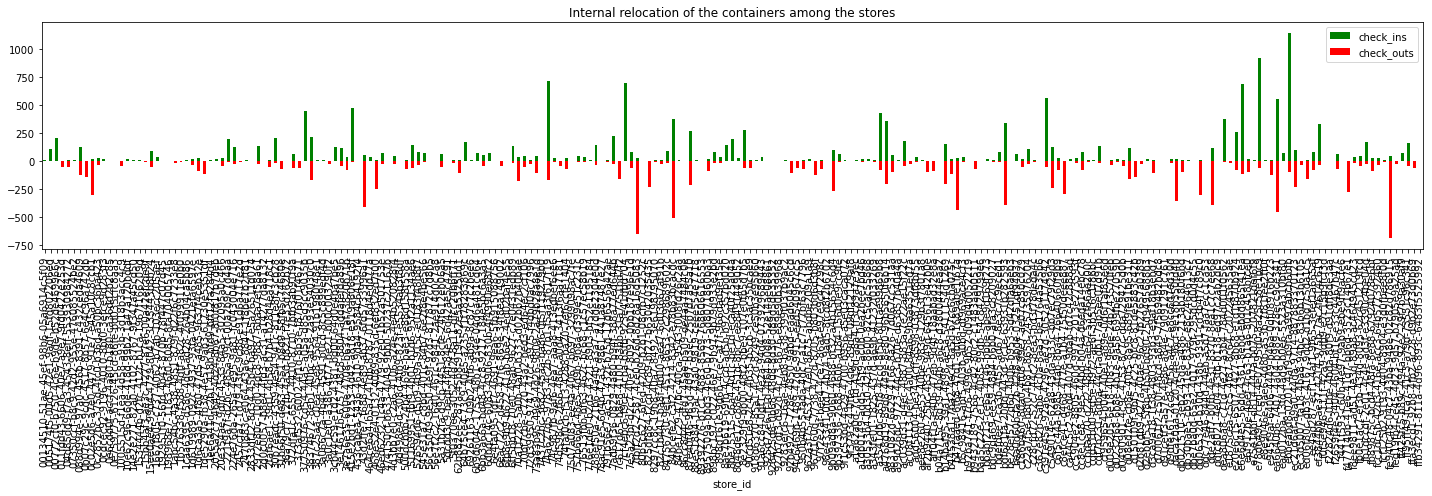

In [212]:
plt.figure(figsize=(20, 7))
plt.title('Internal relocation of the containers among the stores')
ops['check_ins'].plot.bar(color='Green', legend=True)
ops['check_outs'].plot.bar(color='red', legend=True)
plt.show()
# As expected, most of the stores have either higher check-outs in comparison to their check_ins or vs. 
# This phenomen is the reason why Vytal relocate the containers. 
# It justifies that some customers are getting the containers from a store returning them to a different store. 

### ???? Customer transactions
This section intends to inventigate the customer transactions. The csv file that were given by Niclas are used here. However, size of transactions in those file are not same with the ones that I derived from the ContainerLocation complete.csv file. To be consistent, I will continue with the ContainerLocation file. 

?? What is the difference between Container Locations Table and Transactions Table (Check-ins or check-outs)

It is unclear to me why there is a significant difference between two tables (Container Location and Check-ins or Check-out Tables). For now, I continue with transaction data. 

??
How did Niclas get ClaimType of customers? Which table is the master user table ?

## Consumer transactions


In this section, we will analyze the behaviours of the customers.

In [213]:
#Customer Check_ins in Cologne df 
not_internal=co_in['OwnerId'].isin(cologne_int.index)==False 
not_store=co_in['OwnerId'].isin(store_appuser_df.index)==False
c_co_in=co_in[not_internal & not_store ]

print(c_co_in.shape)

# Customer check-outs in Cologne df
x_internal=co_out['next_owner_co_int_']==False
x_store=co_out['next_owner_store_id'].isna()
c_co_out=co_out[x_store & x_internal]
print(c_co_out.shape)



(360601, 18)
(397341, 17)


In [214]:
#c_co_out['next_owner_claim_type'].hist()


In [215]:
c_co_in.columns

Index(['OwnerId', 'NextOwnerId', 'ContainerId', 'OwnerSince', 'OwnerTill',
       'IsBillableTransaction', 'TransactionId', 'container_type_id',
       'owner_store_id', 'next_owner_store_id', 'owner_co_int_',
       'next_owner_co_int_', 'owner_claim_type', 'next_owner_claim_type',
       'geometry', 'OwnerTill_r', 'Source', 'Target'],
      dtype='object')

In [216]:
c_co_in.index.is_unique

True

In [217]:
c_co_out.columns

Index(['OwnerId', 'NextOwnerId', 'ContainerId', 'OwnerSince', 'OwnerTill',
       'IsBillableTransaction', 'TransactionId', 'container_type_id',
       'owner_store_id', 'next_owner_store_id', 'owner_co_int_',
       'next_owner_co_int_', 'owner_claim_type', 'next_owner_claim_type',
       'geometry', 'Source', 'Target'],
      dtype='object')

## Cater transactions

In [218]:
# cater operations
ux=user_df[user_df['ClaimType']=="catering_consumer"]

ux.shape

#con_loc_df[con_loc_df['NextOwnerId'].isin(ux.index)].shape

(5538, 3)

In [219]:

# filter cater transactions
cater_in=c_co_in['OwnerId'].isin(ux.index)
cater_out=c_co_out['NextOwnerId'].isin(ux.index)

#Size of check-ins at the stores
cater_in_df=c_co_in[cater_in].groupby(by=['next_owner_store_id']).size().to_frame()
cater_in_df.columns=["cater_in"]

# Size of chsck-outs at the stores
cater_out_df=c_co_out[cater_out].groupby(by=['owner_store_id']).size().to_frame()

cater_out_df.columns=["cater_out"]
cater_out_df.head()
# merge both df into one df
cater=cater_in_df.join(cater_out_df, how='outer')

cater['cater_out']=cater['cater_out']*(-1)
cater=cater.fillna(0)
cater['cater_delta']=cater['cater_in']+cater['cater_out']
cater.head()

cater_in  cater_out  cater_delta
011fdd43-6606-40e7-a9e7-9fd0422e253d      55.0     -111.0        -56.0
0533ec46-7a40-4e3a-964a-0c5f2fa4f000      50.0        0.0         50.0
0c02e5d6-a7e0-4479-91e7-e45a10c8ccb1       1.0        0.0          1.0
15ee0ae4-99d4-4729-8042-3c35443b8b24      14.0      -18.0         -4.0
20e354ae-9dfd-4533-84a5-302095a0c466       6.0        0.0          6.0

In [220]:
cater.sum()

cater_in       3973.0
cater_out     -4107.0
cater_delta    -134.0
dtype: float64

In [221]:
# daily operations of the stores
ops=c_co_in.groupby(by=['next_owner_store_id']).size()
ops=pd.DataFrame(ops, columns=['check_ins'])
ops.index.names=['store_id']

ops['check_outs']=c_co_out.groupby(by=['owner_store_id']).size()
ops=ops.fillna(0)
ops['check_outs']=ops['check_outs'].astype(int)*(-1)

ops=ops.fillna(0)
ops['delta']=ops['check_ins']+ops['check_outs']

# join with cater operations
ops=ops.join(cater, how='outer').fillna(0).sort_values(by='cater_in', axis=0, ascending=False)

ops['cater_out_ratio']=ops['cater_out']/ops['check_outs']
ops.sort_values('cater_out_ratio', ascending=False).head(10)

check_ins  check_outs  delta  cater_in  \
9e850111-6057-4811-a36b-36ec2f4eff23       2499       -2706   -207    2479.0   
f9eaaa90-c8f9-4fd0-a8df-5f6abf7d74f6         98        -219   -121      98.0   
5a31b2fa-d9cb-4451-8cfe-24f612eb06a5        534        -867   -333      68.0   
da4cefd2-5dca-488d-acee-51353eb5c2e6          4         -19    -15       0.0   
d08ed2fe-cb8e-40f5-8a95-689fe91be311       1247       -1467   -220     291.0   
011fdd43-6606-40e7-a9e7-9fd0422e253d        450        -533    -83      55.0   
84756730-9ef1-4513-8653-2c298689602c       2064       -2528   -464     496.0   
925d72e6-ff1d-4f64-b0d8-52e14ae08861         11         -12     -1       0.0   
9b397336-2688-4606-a184-156b0e9cc9fe        240        -515   -275      12.0   
d0232f68-6b8e-4b1e-9a58-699fbe270590       3829       -4053   -224      76.0   

                                      cater_out  cater_delta  cater_out_ratio  
9e850111-6057-4811-a36b-36ec2f4eff23    -2517.0        -38.0         0.930155  
f9eaaa90-c8f9-4fd0-a8df-5f6abf7d74f6     -136.0        -38.0         0.621005  
5a31b2fa-d9cb-4451-8cfe-24f612eb06a5     -236.0       -168.0         0.272203  
da4cefd2-5dca-488d-acee-51353eb5c2e6       -5.0         -5.0         0.263158  
d08ed2fe-cb8e-40f5-8a95-689fe91be311     -374.0        -83.0         0.254942  
011fdd43-6606-40e7-a9e7-9fd0422e253d     -111.0        -56.0         0.208255  
84756730-9ef1-4513-8653-2c298689602c     -522.0        -26.0         0.206487  
925d72e6-ff1d-4f64-b0d8-52e14ae08861       -1.0         -1.0         0.083333  
9b397336-2688-4606-a184-156b0e9cc9fe      -27.0        -15.0         0.052427  
d0232f68-6b8e-4b1e-9a58-699fbe270590      -88.0        -12.0         0.021712

In [222]:
c_co_in['OwnerSince'].dt.date

1         2019-09-25
2         2019-10-01
3         2019-10-01
4         2019-10-25
5         2019-10-29
             ...    
452933    2022-02-17
452934    2022-02-17
452935    2022-02-17
452936    2022-02-18
452937    2022-02-10
Name: OwnerSince, Length: 360601, dtype: object

In [223]:
# daily operations of the stores
d_s_ops=c_co_in.groupby(by=[c_co_in['OwnerSince'].dt.date,'next_owner_store_id']).size().to_frame('check_ins')



d_s_ops['check_outs']=c_co_out.groupby(by=[c_co_out['OwnerTill'].dt.date,'owner_store_id']).size()
d_s_ops=d_s_ops.fillna(0)
d_s_ops['check_outs']=d_s_ops['check_outs'].astype(int)*(-1)

d_s_ops=d_s_ops.fillna(0)
d_s_ops['delta']=d_s_ops['check_ins']+d_s_ops['check_outs']

d_s_ops.tail()

check_ins  check_outs  delta
OwnerSince next_owner_store_id                                               
2022-03-04 ead012ba-13fd-4ad9-b0e6-5523a310bf80          4         -11     -7
           ebbeabd8-0201-4af9-b9fa-a997abcb6bfb          2         -22    -20
           ec21d6af-a9a0-44da-9714-887883370123          1         -11    -10
           ed06f80c-db3c-4167-9dd2-d1bd7c5da1c5         46         -63    -17
           f9eaaa90-c8f9-4fd0-a8df-5f6abf7d74f6          2         -37    -35

In [224]:
d_s_ops['delt_cat']=pd.qcut(d_s_ops['delta'],4,labels=False)

d_s_ops['delt_cat'].reset_index()

OwnerSince                   next_owner_store_id  delt_cat
0      2019-09-23  cdd31b00-ed5e-4972-ae6f-3b516c1f86bc         2
1      2019-09-23  e20e6c15-6507-4427-8b68-e1d1f870b924         1
2      2019-09-24  cdd31b00-ed5e-4972-ae6f-3b516c1f86bc         3
3      2019-09-24  d4e38d94-eb54-4049-b721-4da7c79f3891         3
4      2019-09-24  e20e6c15-6507-4427-8b68-e1d1f870b924         0
...           ...                                   ...       ...
45683  2022-03-04  ead012ba-13fd-4ad9-b0e6-5523a310bf80         0
45684  2022-03-04  ebbeabd8-0201-4af9-b9fa-a997abcb6bfb         0
45685  2022-03-04  ec21d6af-a9a0-44da-9714-887883370123         0
45686  2022-03-04  ed06f80c-db3c-4167-9dd2-d1bd7c5da1c5         0
45687  2022-03-04  f9eaaa90-c8f9-4fd0-a8df-5f6abf7d74f6         0

[45688 rows x 3 columns]

[]

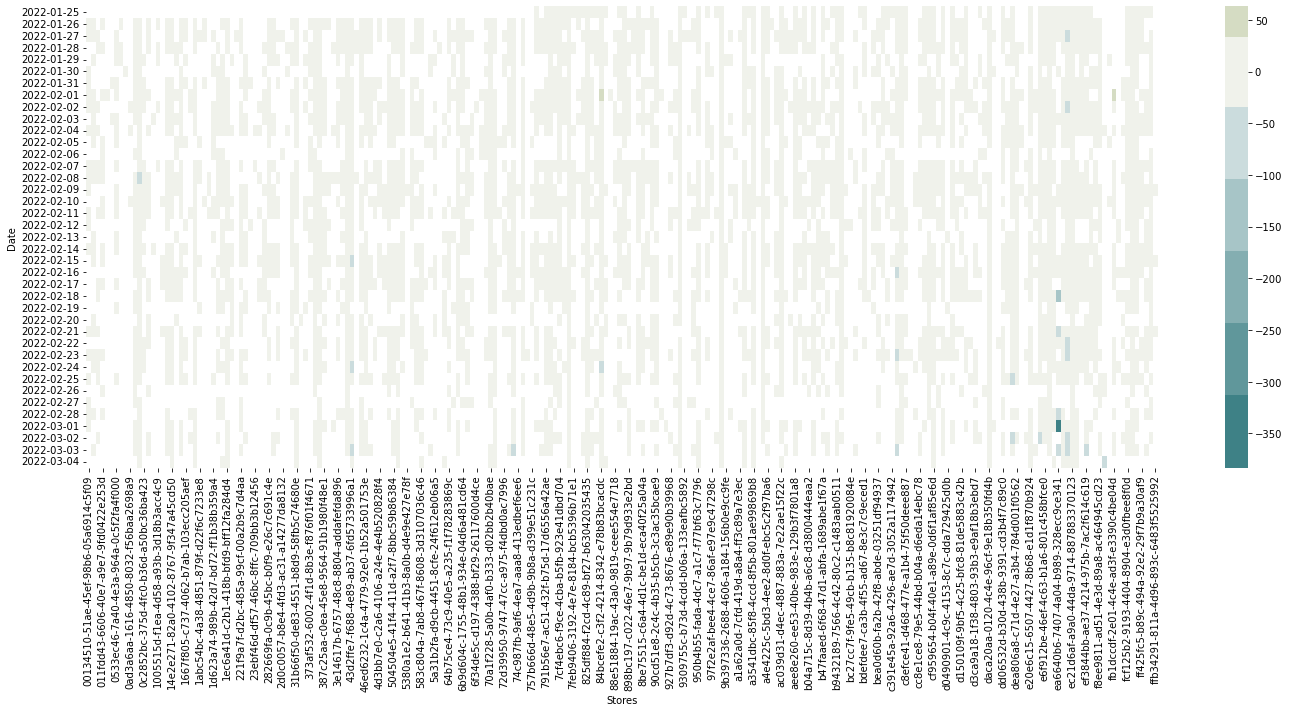

In [225]:
import seaborn as sns

plt.figure(figsize=(20, 10))

trans_ = d_s_ops['delta'].tail(4000).reset_index().pivot("OwnerSince", "next_owner_store_id", "delta")

ax = sns.heatmap(trans_, cmap=sns.diverging_palette(200, 100, n=11), center=0)
ax.set(ylabel='Date', xlabel='Stores')
ax.plot()

In [226]:
#m_df.loc[ops.sort_values('cater_out_ratio', ascending=False).head(1).index,:]

In [227]:
#Top 8 catering stores


map_osm = folium.Map(location=[50.93, 6.91],zoom_start=11)
for ind, row in m_df.loc[ops.sort_values('cater_out_ratio', ascending=False).head(6).index,:].iterrows():
    
    folium.CircleMarker(location=[row["Latitude"], row["Longitude"]],radius=2, popup=ind, color='red').add_to(map_osm)
map_osm

In [228]:
#ops[(ops[['cater_in', 'cater_out']] != 0).any(1)].sort_values(by='cater_out',ascending=True).head()

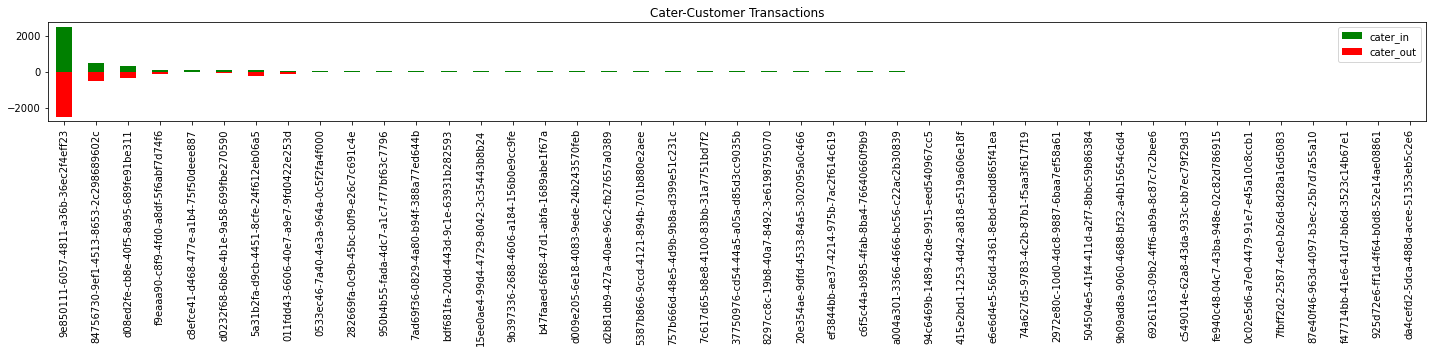

In [229]:
# plot check-ins and check-outs of cater customers
plt.figure(figsize=(20, 5))
plt.title('Cater-Customer Transactions')
ops[(ops[['cater_in', 'cater_out']] != 0).any(1)]['cater_in'].plot.bar(color='Green', legend=True)
ops[(ops[['cater_in', 'cater_out']] != 0).any(1)]['cater_out'].plot.bar(color='red', legend=True)
plt.show()
# 

In [230]:
ops.index.is_unique

True

In [231]:
co_store_delta=m_cologne.merge(ops, how='left', left_index=True, right_index=True).set_axis(m_cologne.index)
#co_store_delta[['check_ins', 'check_outs', 'delta', 'cater_in','cater_out', 'cater_delta']].fillna(0).sort_values(by='cater_out', ascending=False).tail(12)


In [232]:
co_store_delta.shape

(377, 17)

In [233]:
co_store_delta.head(2)

MerchantId  \
Id                                                                           
37750976-cd54-44a5-a05a-d85d3cc9035b  2c1b374d-3d05-4b74-a260-a479c8ef9232   
d4e38d94-eb54-4049-b721-4da7c79f3891  2c9fdbe4-3e32-4916-ba19-147258d0dd1d   

                                                        Name  Longitude  \
Id                                                                        
37750976-cd54-44a5-a05a-d85d3cc9035b  Krua Thai 2 - Heumarkt   6.960161   
d4e38d94-eb54-4049-b721-4da7c79f3891         Fenster zum Hof   6.944754   

                                       Latitude  \
Id                                                
37750976-cd54-44a5-a05a-d85d3cc9035b  50.935471   
d4e38d94-eb54-4049-b721-4da7c79f3891  50.948689   

                                                         CreationDate  \
Id                                                                      
37750976-cd54-44a5-a05a-d85d3cc9035b 2020-10-20 20:04:31.643369+02:00   
d4e38d94-eb54-4049-b721-4da7c79f3891 2019-09-22 21:53:24.930669+02:00   

                                      CategoryId   StreetAddress  City  \
Id                                                                       
37750976-cd54-44a5-a05a-d85d3cc9035b           2     Heumarkt 25  Köln   
d4e38d94-eb54-4049-b721-4da7c79f3891           2  Im Mediapark 5  Köln   

                                      SellsOfflineCards  \
Id                                                        
37750976-cd54-44a5-a05a-d85d3cc9035b              False   
d4e38d94-eb54-4049-b721-4da7c79f3891              False   

                                                      geometry  check_ins  \
Id                                                                          
37750976-cd54-44a5-a05a-d85d3cc9035b  POINT (6.96016 50.93547)     4607.0   
d4e38d94-eb54-4049-b721-4da7c79f3891  POINT (6.94475 50.94869)       60.0   

                                      check_outs   delta  cater_in  cater_out  \
Id                                                                              
37750976-cd54-44a5-a05a-d85d3cc9035b     -5932.0 -1325.0       6.0        0.0   
d4e38d94-eb54-4049-b721-4da7c79f3891       -47.0    13.0       0.0        0.0   

                                      cater_delta  cater_out_ratio  
Id                                                                  
37750976-cd54-44a5-a05a-d85d3cc9035b          6.0             -0.0  
d4e38d94-eb54-4049-b721-4da7c79f3891          0.0             -0.0

In [234]:


map_osm = folium.Map(location=[50.93, 6.91],zoom_start=11)
for ind, row in co_store_delta[["Latitude","Longitude",'cater_out',]].fillna(0).sort_values(by='cater_out', ascending=False).iterrows():
    c=row['cater_out']
    if c<=-500: color='red'
    elif -500<c<0: 
        color='magenta'
    elif c>=0:  color='cyan'
    folium.CircleMarker(location=[row["Latitude"], row["Longitude"]],radius=2, popup=ind, color=color).add_to(map_osm)
#print(count)
map_osm

## Store Operations

In [235]:
ops.head()

check_ins  check_outs  delta  cater_in  \
9e850111-6057-4811-a36b-36ec2f4eff23       2499       -2706   -207    2479.0   
84756730-9ef1-4513-8653-2c298689602c       2064       -2528   -464     496.0   
d08ed2fe-cb8e-40f5-8a95-689fe91be311       1247       -1467   -220     291.0   
f9eaaa90-c8f9-4fd0-a8df-5f6abf7d74f6         98        -219   -121      98.0   
c8efce41-d468-477e-a1b4-75f50deee887        455        -153    302      91.0   

                                      cater_out  cater_delta  cater_out_ratio  
9e850111-6057-4811-a36b-36ec2f4eff23    -2517.0        -38.0         0.930155  
84756730-9ef1-4513-8653-2c298689602c     -522.0        -26.0         0.206487  
d08ed2fe-cb8e-40f5-8a95-689fe91be311     -374.0        -83.0         0.254942  
f9eaaa90-c8f9-4fd0-a8df-5f6abf7d74f6     -136.0        -38.0         0.621005  
c8efce41-d468-477e-a1b4-75f50deee887        0.0         91.0        -0.000000

In [236]:
co_store_delta.head(2)

MerchantId  \
Id                                                                           
37750976-cd54-44a5-a05a-d85d3cc9035b  2c1b374d-3d05-4b74-a260-a479c8ef9232   
d4e38d94-eb54-4049-b721-4da7c79f3891  2c9fdbe4-3e32-4916-ba19-147258d0dd1d   

                                                        Name  Longitude  \
Id                                                                        
37750976-cd54-44a5-a05a-d85d3cc9035b  Krua Thai 2 - Heumarkt   6.960161   
d4e38d94-eb54-4049-b721-4da7c79f3891         Fenster zum Hof   6.944754   

                                       Latitude  \
Id                                                
37750976-cd54-44a5-a05a-d85d3cc9035b  50.935471   
d4e38d94-eb54-4049-b721-4da7c79f3891  50.948689   

                                                         CreationDate  \
Id                                                                      
37750976-cd54-44a5-a05a-d85d3cc9035b 2020-10-20 20:04:31.643369+02:00   
d4e38d94-eb54-4049-b721-4da7c79f3891 2019-09-22 21:53:24.930669+02:00   

                                      CategoryId   StreetAddress  City  \
Id                                                                       
37750976-cd54-44a5-a05a-d85d3cc9035b           2     Heumarkt 25  Köln   
d4e38d94-eb54-4049-b721-4da7c79f3891           2  Im Mediapark 5  Köln   

                                      SellsOfflineCards  \
Id                                                        
37750976-cd54-44a5-a05a-d85d3cc9035b              False   
d4e38d94-eb54-4049-b721-4da7c79f3891              False   

                                                      geometry  check_ins  \
Id                                                                          
37750976-cd54-44a5-a05a-d85d3cc9035b  POINT (6.96016 50.93547)     4607.0   
d4e38d94-eb54-4049-b721-4da7c79f3891  POINT (6.94475 50.94869)       60.0   

                                      check_outs   delta  cater_in  cater_out  \
Id                                                                              
37750976-cd54-44a5-a05a-d85d3cc9035b     -5932.0 -1325.0       6.0        0.0   
d4e38d94-eb54-4049-b721-4da7c79f3891       -47.0    13.0       0.0        0.0   

                                      cater_delta  cater_out_ratio  
Id                                                                  
37750976-cd54-44a5-a05a-d85d3cc9035b          6.0             -0.0  
d4e38d94-eb54-4049-b721-4da7c79f3891          0.0             -0.0

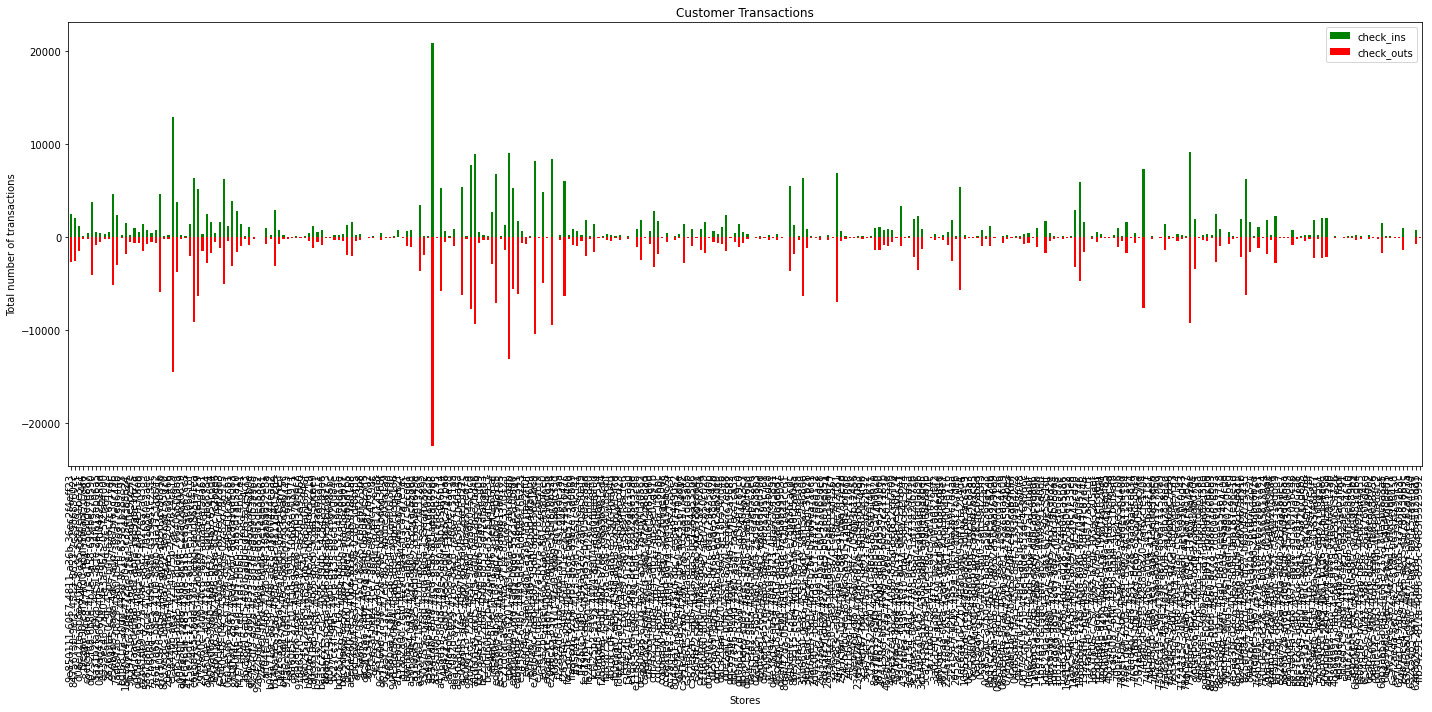

In [237]:
# plot check-ins and check-outs
plt.figure(figsize=(20, 10))
plt.title('Customer Transactions')

ops['check_ins'].plot.bar(color='Green', legend=True)
ops['check_outs'].plot.bar(color='red', legend=True)
plt.xlabel('Stores')
plt.ylabel('Total number of transactions')
plt.show()
# As expected, most of the stores have either higher check-outs in comparison to their check_ins or vs. 
# This phenomen is the reason why Vytal relocate the containers. 
# It justifies that some customers are getting the containers from a store returning them to a different store. 

In [238]:
ops.sort_values('check_outs', ascending=True)
ops['delta']=ops['check_ins']+ ops['check_outs']

In [239]:
# plot stores: colors show the absolute value of transaction sizes in whole transactional data (check_ins+check_outs)

co_store_delta=m_cologne.merge(ops, how='left', left_index=True, right_index=True).set_axis(m_cologne.index)

map_osm = folium.Map(location=[50.93, 6.91],zoom_start=11, tiles ='Stamen Toner')
for ind, row in co_store_delta.iterrows():
    if row['delta']<-500: color='red'
    elif row['delta']<-100: color='orange'
    elif row['delta']<0: color='yellow' 
    elif row['delta']>0: color='limegreen'
    elif row['delta']>100: color='green'
    elif row['delta']>500: color='darkgreen'
    else: color='green'
    folium.CircleMarker(location=[row["Latitude"], row["Longitude"]],radius=2, popup=ind, color=color).add_to(map_osm)
map_osm

In [240]:
# Filter only normal consumers 
in_1=c_co_in['owner_claim_type']=='consumer' 
#in_2=c_co_in['owner_claim_type']=='catering_consumer' # in case of
c_co_in=c_co_in[in_1 ]

out_1=c_co_out['next_owner_claim_type']=='consumer' 
#out_2= c_co_out['next_owner_claim_type']=='catering_consumer' 
c_co_out=c_co_out[out_1 ]



### Outlier consumer analysis

In [241]:
# number of consumers
len(c_co_out['NextOwnerId'].unique())

20824

In [242]:
c_co_out['IsBillableTransaction'].value_counts()

True     351137
False         3
Name: IsBillableTransaction, dtype: int64

In [243]:
# check how many containers the consumers check-out daily
dfc=c_co_out.groupby([c_co_out['OwnerSince'].dt.date,'NextOwnerId']).size().to_frame('count').sort_values('count',ascending=False)
outlier=dfc[dfc['count']>5] # I assume that a normal consumer can take max 4 containers in a day.
outlier.head(10)

count
OwnerSince NextOwnerId                                
2020-05-04 b681d72a-6d3e-4c87-b11b-1ddb2535bf61     72
2020-05-19 b681d72a-6d3e-4c87-b11b-1ddb2535bf61     68
2020-05-26 b681d72a-6d3e-4c87-b11b-1ddb2535bf61     59
2020-05-28 b681d72a-6d3e-4c87-b11b-1ddb2535bf61     59
2020-05-20 b681d72a-6d3e-4c87-b11b-1ddb2535bf61     58
2020-05-13 b681d72a-6d3e-4c87-b11b-1ddb2535bf61     54
2020-05-27 b681d72a-6d3e-4c87-b11b-1ddb2535bf61     50
2021-09-25 3da4f1ee-cf9e-407b-8ca3-c0cf0af97c1d     50
2020-05-12 b681d72a-6d3e-4c87-b11b-1ddb2535bf61     40
2020-05-05 b681d72a-6d3e-4c87-b11b-1ddb2535bf61     39

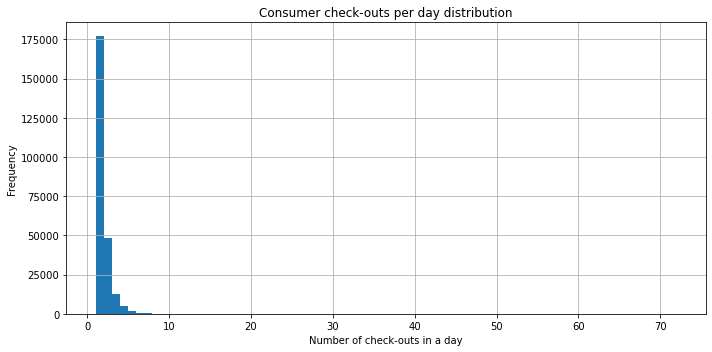

In [244]:
dfc.hist(bins=72, figsize=(10,5))

plt.title('Consumer check-outs per day distribution')
plt.xlabel('Number of check-outs in a day')
plt.ylabel('Frequency')
plt.show()

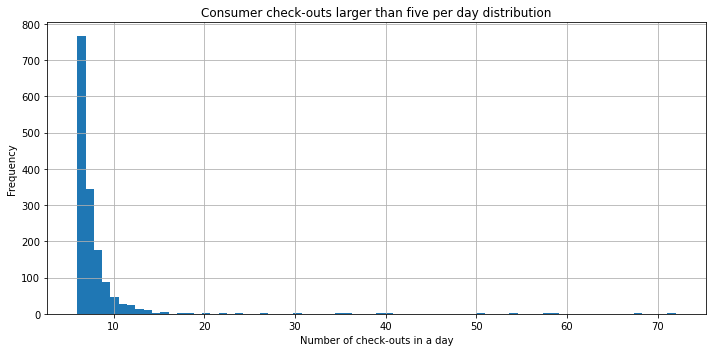

In [245]:

outlier.hist(bins=72, figsize=(10,5))

plt.title('Consumer check-outs larger than five per day distribution')
plt.xlabel('Number of check-outs in a day')
plt.ylabel('Frequency')
plt.show()

## ????

In [246]:
# Are the following users not normal consumers

# total number of check out consumers
print('number of consumers in checkout data :',len(set(list(c_co_out['NextOwnerId']))))
# number of unique users whom have been assumed NOT normal consumers
print('number of outlier consumers ',len(outlier.index.unique(level=1))) 

number of consumers in checkout data : 20824
number of outlier consumers  976


In [247]:
print(c_co_out.shape)
drop_list=c_co_out['NextOwnerId'].isin(outlier.index.unique(level=1))==False
c_co_out=c_co_out[drop_list]
c_co_out.shape

(351140, 17)


(281719, 17)

In [251]:
c_co_out['NextOwnerId'].isin(outlier.index.unique(level=1))

1         False
3         False
4         False
5         False
6         False
          ...  
498093    False
498116    False
498163    False
498164    False
498165    False
Name: NextOwnerId, Length: 281719, dtype: bool

In [248]:
281719/341101

0.8259108006133081

In [252]:
# check how many containers the consumers check in daily
df=c_co_in.groupby([c_co_in['OwnerTill'].dt.date,'OwnerId']).size().to_frame('count').sort_values('count',ascending=False)
outlier=df[df['count']>5] # I assume that a normal consumer can bring max 4 containers in a day.
#outlier.head(10)
print('before : ',c_co_in.shape)
drop_list=c_co_in['OwnerId'].isin(outlier.index.unique(level=1))==False
c_co_in=c_co_in[drop_list]
print('after :',c_co_in.shape)

before :  (341101, 18)
after : (240206, 18)


In [253]:
#outlier['count'].sum()/df['count'].sum()

In [254]:
240206/341101

0.704207844597348

### Container Type

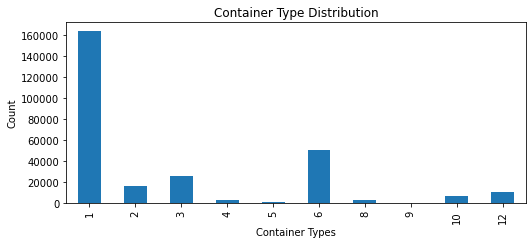

In [255]:
c_co_out['container_type_id'].dropna().astype(int).value_counts().sort_index().plot.bar()
plt.title('Container Type Distribution')
plt.xlabel('Container Types')
plt.ylabel('Count')
plt.show()


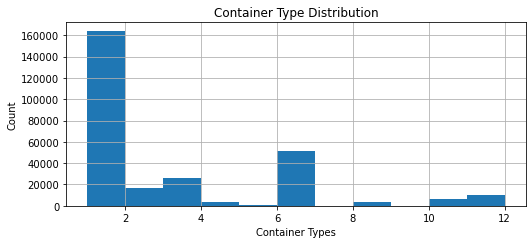

In [256]:
c_co_out['container_type_id'].hist(bins=11)
plt.title('Container Type Distribution')
plt.xlabel('Container Types')
plt.ylabel('Count')
plt.show()

In [257]:
## Save the dataframes for further analysis
c_co_in.to_csv('association_c_co_in.csv')
c_co_out.to_csv('association_c_co_out.csv')
#%store c_co_in
#%store c_co_out
c_co_out.tail(2)

OwnerId  \
498164  addf362b-e42f-491f-9700-ac906bf3c7c5   
498165  addf362b-e42f-491f-9700-ac906bf3c7c5   

                                 NextOwnerId  \
498164  fb919c9b-4f0b-4814-8fc2-941e96e0c043   
498165  fb919c9b-4f0b-4814-8fc2-941e96e0c043   

                                 ContainerId                       OwnerSince  \
498164  e7d2ea07-664b-4826-a536-a85792a4c56a 2022-03-04 17:10:55.229060+01:00   
498165  e7c490e9-a02a-4801-936c-f293b5e86903 2022-03-04 17:10:55.229060+01:00   

                              OwnerTill  IsBillableTransaction  \
498164 2022-03-04 17:17:56.721385+01:00                   True   
498165 2022-03-04 17:17:56.721385+01:00                   True   

                               TransactionId  container_type_id  \
498164  fc5c60c0-26ca-4960-bc94-e4e9aea0573f                1.0   
498165  fc5c60c0-26ca-4960-bc94-e4e9aea0573f                1.0   

                              owner_store_id next_owner_store_id  \
498164  415e2bd1-1253-4d42-a818-e519a606e18f                 NaN   
498165  415e2bd1-1253-4d42-a818-e519a606e18f                 NaN   

        owner_co_int_  next_owner_co_int_ owner_claim_type  \
498164          False               False     storeappuser   
498165          False               False     storeappuser   

       next_owner_claim_type                         geometry  \
498164              consumer  POINT (2565158.999 5643052.807)   
498165              consumer  POINT (2565158.999 5643052.807)   

                                      Source  \
498164  415e2bd1-1253-4d42-a818-e519a606e18f   
498165  415e2bd1-1253-4d42-a818-e519a606e18f   

                                      Target  
498164  fb919c9b-4f0b-4814-8fc2-941e96e0c043  
498165  fb919c9b-4f0b-4814-8fc2-941e96e0c043

### Save updated store data

In [258]:
# For the sake of simplicity, we continue only with container_type 1. 
c_co_in=c_co_in[c_co_in['container_type_id']==1]
c_co_out=c_co_out[c_co_out['container_type_id']==1]

## Save the dataframes for further analysis

#save file of stores
co_store_delta.to_file("co_store_delta.geojson", driver="GeoJSON")
%store co_store_delta
#transactions
c_co_in.to_csv('c_co_in.csv')
c_co_out.to_csv('c_co_out.csv')

#c_co_out.tail(2)
%store co_store_delta
%store c_co_in
%store c_co_out

Stored 'co_store_delta' (GeoDataFrame)
Stored 'co_store_delta' (GeoDataFrame)
Stored 'c_co_in' (GeoDataFrame)
Stored 'c_co_out' (GeoDataFrame)
